In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spotifuncs import *

In [2]:
path = Path("C:/Users/ms101/OneDrive/DataScience_ML/projects/spotify_app")

In [3]:
with open(path / "client_s.txt") as f:
    content = f.readlines()
content = [x.strip() for x in content]

client_id = content[0]
client_secret = content[1]

In [4]:
with open(path / "usernames.txt") as f:
    usernames = f.readlines()
usernames = [x.strip() for x in usernames]

username = usernames[0]


In [5]:
scope = "user-library-read user-read-recently-played user-top-read playlist-modify-public playlist-read-private playlist-read-collaborative"

redirect_uri = "https://developer.spotify.com/dashboard/applications/4a4e029d299a4241873db8300038bf0a"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)

In [6]:
sp = authenticate(redirect_uri, client_credentials_manager, username, scope, client_id, client_secret)

In [7]:
top_tracks_short = sp.current_user_top_tracks(limit = 50,offset=0,time_range='short_term')
top_tracks_med = sp.current_user_top_tracks(limit = 50,offset=0,time_range='medium_term')
top_tracks_long = sp.current_user_top_tracks(limit = 50,offset=0,time_range='long_term')

#combine the top_tracks
top_tracks_short_df = append_audio_features(create_df_top_songs(top_tracks_short),sp)
top_tracks_med_df = append_audio_features(create_df_top_songs(top_tracks_med),sp)
top_tracks_long_df = append_audio_features(create_df_top_songs(top_tracks_long),sp)

top_tracks_short_df["Timeframe"] = "short term"
top_tracks_med_df["Timeframe"] = "medium term"
top_tracks_long_df["Timeframe"] = "long term"

top_tracks = pd.concat([top_tracks_short_df, top_tracks_med_df, top_tracks_long_df])
top_tracks = top_tracks.reset_index(drop = True)

top_artists_long = sp.current_user_top_artists(limit = 50, time_range = "long_term")
top_artists_med = sp.current_user_top_artists(limit = 50, time_range = "medium_term")
top_artists_short = sp.current_user_top_artists(limit = 50, time_range = "short_term")


artists_short_df = top_artists_from_API(top_artists_short)
artists_med_df = top_artists_from_API(top_artists_med)
artists_long_df = top_artists_from_API(top_artists_long)


artists_df = pd.concat([artists_short_df,artists_med_df,artists_long_df])
artists_df["genres"] = artists_df["genres"].apply(lambda x: ",".join(x))
artists_df.drop_duplicates().reset_index(drop = True)

,name,id,genres,popularity,uri
0,Rammstein,6wWVKhxIU2cEi0K81v7HvP,"alternative metal,german metal,industrial,indu...",79,spotify:artist:6wWVKhxIU2cEi0K81v7HvP
1,Fynn Kliemann,2YIxQoGvBukvoC1CbJ7opS,german pop,65,spotify:artist:2YIxQoGvBukvoC1CbJ7opS
2,Joyner Lucas,6C1ohJrd5VydigQtaGy5Wa,"boston hip hop,pop rap,rap",78,spotify:artist:6C1ohJrd5VydigQtaGy5Wa
3,Frank Sinatra,1Mxqyy3pSjf8kZZL4QVxS0,"adult standards,easy listening,lounge",87,spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0
4,Geegun,5W7N6u4EjCEMKj7bDyzPEC,"russian dance,russian dance pop,russian hip ho...",57,spotify:artist:5W7N6u4EjCEMKj7bDyzPEC
...,...,...,...,...,...
94,KSHMR,2wX6xSig4Rig5kZU6ePlWe,"big room,deep big room,edm,electro house,india...",73,spotify:artist:2wX6xSig4Rig5kZU6ePlWe
95,Chris Rock,36eSjIksD6fehqxyDUHDA3,"black comedy,comedy",48,spotify:artist:36eSjIksD6fehqxyDUHDA3
96,Carnage,7CCjtD0hCK005Bvg2WG1a7,"edm,electro house,electronic trap,pop rap,rap,...",64,spotify:artist:7CCjtD0hCK005Bvg2WG1a7
97,Wardruna,0NJ6wlOAsAJ1PN4VRdTPKA,"medieval folk,nordic folk,rune folk,viking folk",62,spotify:artist:0NJ6wlOAsAJ1PN4VRdTPKA


In [8]:
top_tracks.drop_duplicates()

,track_name,album,track_id,artist,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Timeframe
0,Who - Single Version,Who,0CjBORMsmiQNe3vPDcNIvk,Modeselektor,207988,43,0.760,0.910,7,-8.472,1,0.0484,0.044200,0.006620,0.1080,0.3920,142.982,short term
1,Lambo Lambo,KitschKrieg,7oqvRZNv4dUV8CgQWtIAMe,KitschKrieg,214991,60,0.876,0.400,5,-9.748,0,0.1290,0.494000,0.000009,0.1000,0.4840,144.938,short term
2,Oh Junge,KitschKrieg,0JqbpesudPE6j901fBEzo2,KitschKrieg,193946,58,0.878,0.515,1,-7.715,1,0.1880,0.029200,0.000000,0.0835,0.2690,156.000,short term
3,Zuhause,Nie,5vC4M4GjYLkgDaUwQcL7WA,Fynn Kliemann,197887,66,0.656,0.448,9,-8.676,0,0.0442,0.860000,0.000005,0.1030,0.4030,95.626,short term
4,Fall Slowly (feat. Ashanti) - Extended Version,Evolution,7wK4pOTZKVaAJ00rziu901,Joyner Lucas,292056,58,0.542,0.453,6,-11.208,0,0.2400,0.204000,0.000007,0.1370,0.0375,88.310,short term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,The Beautiful & Damned,The Beautiful & Damned,2WWruw7ul9N7eqoHELyMc2,G-Eazy,189306,61,0.656,0.804,8,-5.191,0,0.3630,0.173000,0.000000,0.8370,0.3140,125.882,long term
146,Like A G6,Like a G6,5S1yeuswEPofFOCkMFLNLc,Far East Movement,218346,0,0.629,0.869,7,-7.013,0,0.3140,0.006570,0.000000,0.1910,0.7150,125.024,long term
147,Halftime,Wolke 7,1N9ZAbqVw5o0m7wccSgRIt,Gzuz,181060,1,0.533,0.783,2,-6.490,1,0.3250,0.181000,0.000000,0.1010,0.4710,129.844,long term
148,Push It,Wisconsin Death Trip,43WFwjiWFHc8ZryT1Tz1aY,Static-X,154906,37,0.557,0.977,0,-3.965,1,0.0493,0.000393,0.000004,0.2910,0.5040,149.879,long term


In [9]:
list(top_tracks_short_df.columns[6:-2])

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

In [10]:
audio_features = list(top_tracks_short_df.columns[6:-2])
audio_features.append("Timeframe")

In [11]:
audio_overtime_df = top_tracks[audio_features].groupby("Timeframe").mean()
audio_overtime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
Timeframe,,,,,,,,,,
long term,0.61314,0.78496,5.78,-5.44072,0.52,0.248948,0.092208,0.064601,0.212500,0.422921
medium term,0.61784,0.75652,5.18,-6.04674,0.52,0.145466,0.106589,0.039815,0.213790,0.362230
short term,0.68280,0.62192,5.58,-8.27152,0.48,0.152014,0.215322,0.209815,0.239122,0.362832


In [12]:
audio_overtime_df.reset_index(inplace = True)
df_loud_key = audio_overtime_df[["loudness","key"]] #for better viz these need to be plotted seperately
df_loud_key.set_index(pd.Index(["long term", "medium term", "short term"]), inplace = True)

In [13]:
audio_overtime_df.drop(["loudness","key"], axis = 1, inplace = True)

In [14]:
plot_df = pd.melt(audio_overtime_df, id_vars = "Timeframe",
                           var_name = "audio_feature", value_name = "mean")
plot_df

,Timeframe,audio_feature,mean
0,long term,danceability,0.613140
1,medium term,danceability,0.617840
2,short term,danceability,0.682800
3,long term,energy,0.784960
4,medium term,energy,0.756520
5,short term,energy,0.621920
6,long term,mode,0.520000
7,medium term,mode,0.520000
8,short term,mode,0.480000
9,long term,speechiness,0.248948


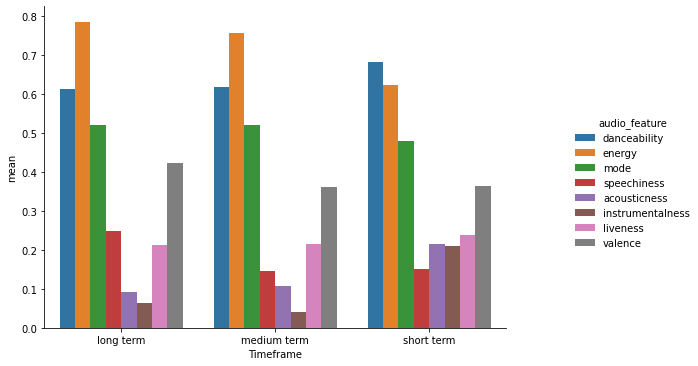

In [15]:
#%matplotlib inline
sns.catplot(data = plot_df, kind = "bar", x = "Timeframe",
            y = "mean", hue = "audio_feature"
)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [16]:
cluster_feat = audio_features[:-1]
cluster_feat

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence']

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>]], dtype=object)

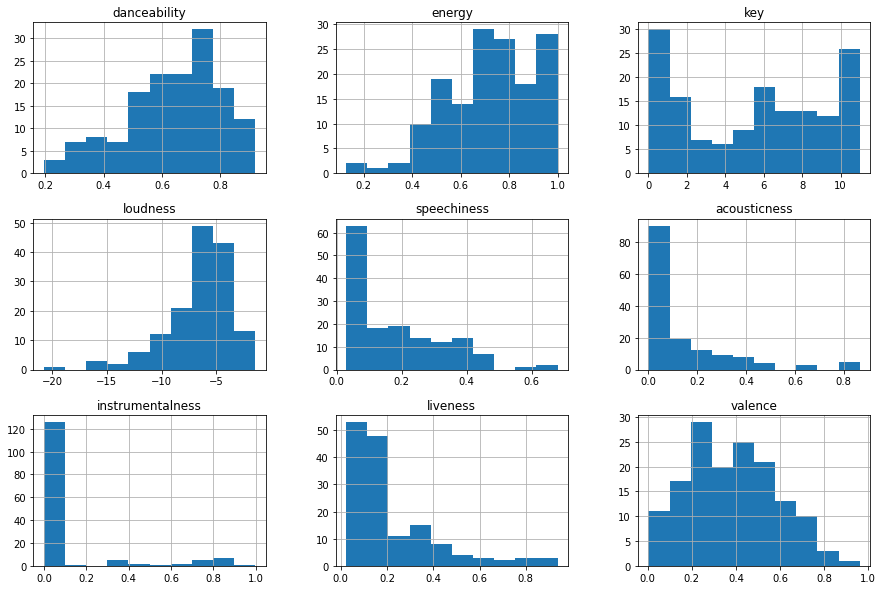

In [17]:
df_cluster = top_tracks[cluster_feat].drop("mode",axis = 1)
df_cluster.hist(figsize= (15,10))

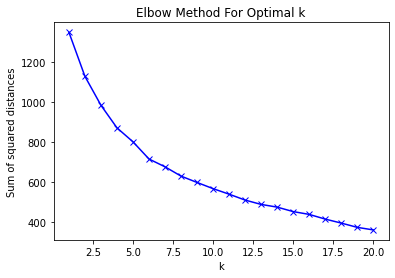

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = np.array(df_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


ss_dist = []
for k in range(1,21):
    km = KMeans(n_clusters=k,max_iter = 10000 ,random_state=13)
    km = km.fit(X)
    ss_dist.append(km.inertia_)
    
plt.plot(range(1,21), ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()



<AxesSubplot:>

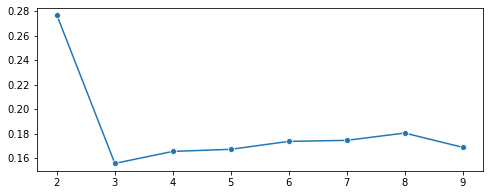

In [19]:
from sklearn.metrics import silhouette_score
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
sns.lineplot(x = range(2, 10), y = silhouette_scores,marker="o")

In [40]:
n_cluster = 6
km = KMeans(n_clusters = n_cluster, max_iter = 10000, random_state=13).fit(X)

In [41]:
X_pred = km.predict(X)

In [42]:
X_pred.shape

(150,)

In [43]:
top_tracks["cluster"] = X_pred

In [44]:
for i in range(1,n_cluster+1):
    print("\n",top_tracks[["track_name","artist"]][top_tracks["cluster"] == i].drop_duplicates(), "\n")



              track_name              artist
5            By My Side              Ecepta
8                Zunder       Marek Hemmann
15       Waiting Around             BoomBox
18         Blooming Era  Enrico Sangiuliano
19                  Neo   Christian Löffler
29   Zwitscherzwitscher              Rampue
30       Bottom Feeders      Isaac Chambers
33        Can't Take It           AKKI (DE)
37         Crispy Bacon     Laurent Garnier
39                Siren             Tourist
42               So Far      Ólafur Arnalds
88            Magnifico                Kilo
118          Light Rain          Chill Bees
127          Until Dawn              Jaeger 


                                          track_name          artist
0                              Who - Single Version    Modeselektor
2                                          Oh Junge     KitschKrieg
4    Fall Slowly (feat. Ashanti) - Extended Version    Joyner Lucas
6                                        Coco L'Eau      Egor 

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=5000, random_state=13)
tsne_results = tsne.fit_transform(X)

df_tsne = pd.DataFrame(tsne_results)
df_tsne.columns = ['D1', 'D2']
df_tsne['label'] = km.labels_
df_tsne.head()

,D1,D2,label
0,4.823404,0.728941,2
1,-0.389895,-1.680083,5
2,0.750389,-0.054148,2
3,-0.669502,-2.830237,5
4,1.925185,-3.194834,2


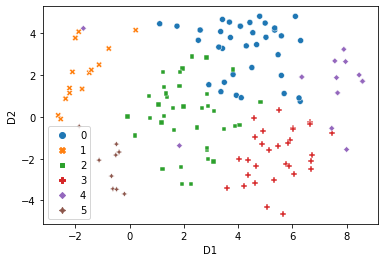

In [46]:
sns.scatterplot(data = df_tsne, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum())
pca.explained_variance_ratio_.cumsum()

0.5768743066837753


array([0.26281223, 0.44661126, 0.57687431])

not enough variance explained for sensible visualisation

In [48]:
tsne3 = TSNE(n_components=3, n_iter=5000, random_state=13, perplexity=50)
tsne_results = tsne3.fit_transform(X)

In [49]:
df_tsne3 = pd.DataFrame(tsne_results)
df_tsne3.columns = ['D1', 'D2', 'D3']
df_tsne3['label'] = km.labels_
df_tsne3.head()

,D1,D2,D3,label
0,624.382935,-93.204903,63.264420,2
1,-185.143341,-209.190048,-363.956879,5
2,33.380653,-153.681870,-350.942291,2
3,-195.708130,-441.540436,-255.700180,5
4,-66.709648,-604.682678,-114.184532,2


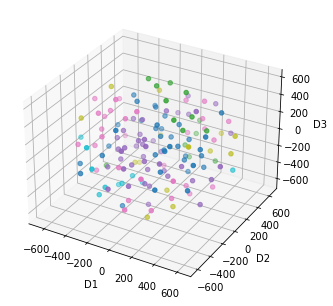

In [50]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_tsne3['D1'], df_tsne3['D2'], df_tsne3['D3'],
           c=df_tsne3['label'], cmap='tab10')

ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.show()

In [51]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components=2, kernel = "rbf", gamma = 0.04)
rbf_pca_results = rbf_pca.fit_transform(X)

df_rbf_pca = pd.DataFrame(rbf_pca_results)
df_rbf_pca.columns = ['D1', 'D2']
df_rbf_pca['label'] = km.labels_
df_rbf_pca.head()

,D1,D2,label
0,-0.067540,-0.009966,2
1,0.523905,-0.057627,5
2,0.256085,0.045457,2
3,0.453155,0.071320,5
4,0.353061,0.215603,2


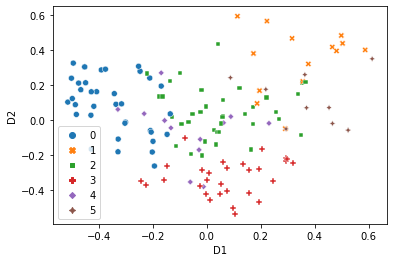

In [52]:
sns.scatterplot(data = df_rbf_pca, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

In [53]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=5)
lle_results = lle.fit_transform(X)

df_lle = pd.DataFrame(lle_results)
df_lle.columns = ['D1', 'D2']
df_lle['label'] = km.labels_
df_lle.head()

,D1,D2,label
0,0.026207,0.025889,2
1,0.020199,0.001351,5
2,-0.027577,0.098385,2
3,0.072817,-0.064120,5
4,-0.025086,-0.005538,2


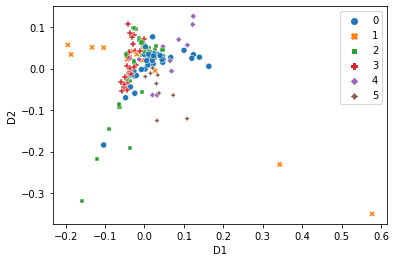

In [54]:
sns.scatterplot(data = df_lle, x = "D1", y = "D2", hue = "label", style = "label",
                palette = "tab10")
plt.legend()
plt.show()

that did not work well.
t-sne seems to be a good solution for visualisation

In [55]:
#average song feature per cluster (what are our clusters representing?)
df_cluster

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,cluster
0,0.760,0.910,0.0484,0.044200,0.006620,0.1080,0.3920,0
1,0.876,0.400,0.1290,0.494000,0.000009,0.1000,0.4840,1
2,0.878,0.515,0.1880,0.029200,0.000000,0.0835,0.2690,0
3,0.656,0.448,0.0442,0.860000,0.000005,0.1030,0.4030,1
4,0.542,0.453,0.2400,0.204000,0.000007,0.1370,0.0375,1
...,...,...,...,...,...,...,...,...
145,0.656,0.804,0.3630,0.173000,0.000000,0.8370,0.3140,0
146,0.629,0.869,0.3140,0.006570,0.000000,0.1910,0.7150,0
147,0.533,0.783,0.3250,0.181000,0.000000,0.1010,0.4710,0
148,0.557,0.977,0.0493,0.000393,0.000004,0.2910,0.5040,0


In [56]:
df_cluster["cluster"] = X_pred
df_cluster.drop(["key","loudness"],axis = 1,inplace = True)

KeyError: "['key' 'loudness'] not found in axis"

In [57]:
df_radar = df_cluster.groupby("cluster").mean().reset_index()
df_radar

,cluster,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0,0.477108,0.913459,0.151605,0.033007,0.062214,0.178316,0.414595
1,1,0.642133,0.600667,0.084240,0.146256,0.786667,0.220920,0.254150
2,2,0.708024,0.645476,0.154948,0.115980,0.000730,0.160081,0.299786
3,3,0.729594,0.706594,0.338272,0.135199,0.002868,0.177453,0.484625
4,4,0.638714,0.795857,0.161721,0.107236,0.056171,0.675357,0.420286
5,5,0.637800,0.449900,0.085180,0.659200,0.070084,0.150220,0.426390


In [58]:
# https://python-graph-gallery.com/392-use-faceting-for-radar-chart/
from math import pi, ceil

def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    # Initialise the radar plot
    ax = plt.subplot(2,ceil(num_clusters/2),row+1, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

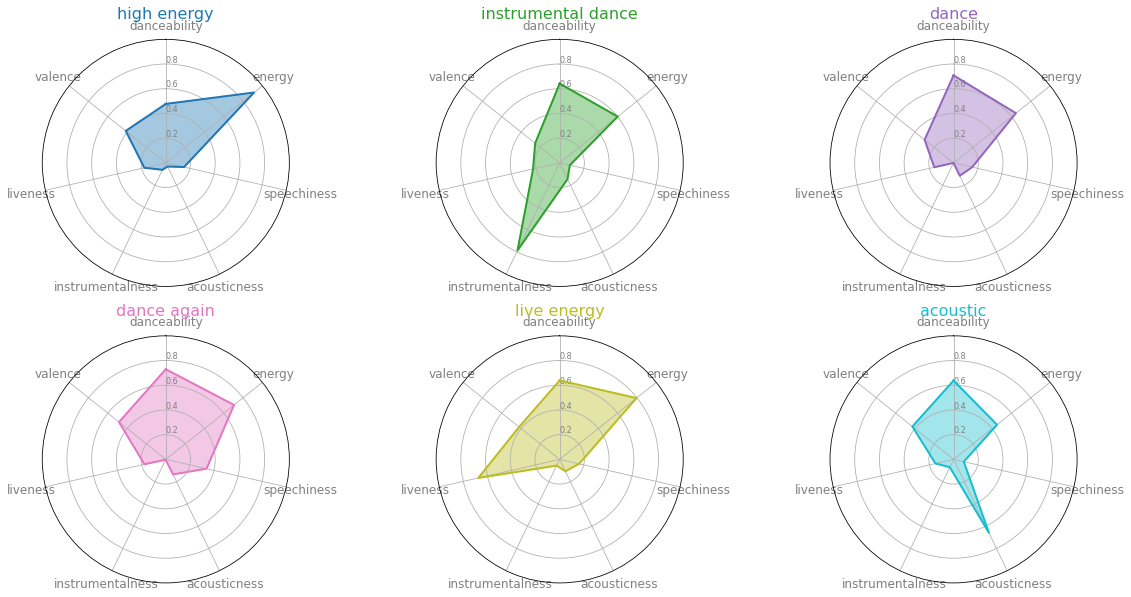

In [61]:
plt.figure(figsize = (20,10))
my_palette = plt.cm.get_cmap("tab10", len(df_radar.index))
title_list = ["high energy", "instrumental dance","dance","dance again","live energy","acoustic"]

for row in range(0, len(df_radar.index)):
    make_radar(row=row, title= title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))